<a href="https://colab.research.google.com/github/ShivamSoni11/Breast_Cancer_Data_Analysis/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

data = datasets.load_breast_cancer()

X, y = data.data, data.target
print(X.shape)

(569, 30)


2. Standardise the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

(569, 30)


Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


Creating the neural netwok

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Specifying the type of model

In [ ]:
classifier = Sequential()  #Initializing the ANN

Adding the layers of Neural Network

In [ ]:
classifier.add(Dense(units=16, activation='relu', input_dim=30))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

Compiling the Neural Network


In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


Training the Neural Network

In [ ]:
h = classifier.fit(X_train,y_train, batch_size=32, epochs=150, verbose=2, validation_split=.20)

Epoch 1/150
12/12 - 0s - loss: 0.6912 - accuracy: 0.5440 - val_loss: 0.6581 - val_accuracy: 0.6484
Epoch 2/150
12/12 - 0s - loss: 0.6482 - accuracy: 0.6374 - val_loss: 0.6251 - val_accuracy: 0.6484
Epoch 3/150
12/12 - 0s - loss: 0.6170 - accuracy: 0.6621 - val_loss: 0.5944 - val_accuracy: 0.6593
Epoch 4/150
12/12 - 0s - loss: 0.5841 - accuracy: 0.6896 - val_loss: 0.5607 - val_accuracy: 0.6813
Epoch 5/150
12/12 - 0s - loss: 0.5484 - accuracy: 0.7253 - val_loss: 0.5175 - val_accuracy: 0.7363
Epoch 6/150
12/12 - 0s - loss: 0.5059 - accuracy: 0.7967 - val_loss: 0.4716 - val_accuracy: 0.7802
Epoch 7/150
12/12 - 0s - loss: 0.4561 - accuracy: 0.8544 - val_loss: 0.4222 - val_accuracy: 0.8242
Epoch 8/150
12/12 - 0s - loss: 0.4003 - accuracy: 0.8874 - val_loss: 0.3704 - val_accuracy: 0.8462
Epoch 9/150
12/12 - 0s - loss: 0.3390 - accuracy: 0.9121 - val_loss: 0.3180 - val_accuracy: 0.8462
Epoch 10/150
12/12 - 0s - loss: 0.2796 - accuracy: 0.9231 - val_loss: 0.2651 - val_accuracy: 0.8681
Epoch 11/

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Accuracy')

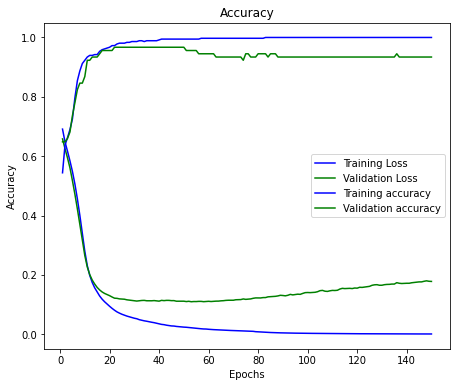

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(range(1,151),h.history['loss'], c='b', label='Training Loss')
plt.plot(range(1,151),h.history['val_loss'], c='g', label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,2,1)
plt.plot(range(1,151),h.history['accuracy'], c='b', label='Training accuracy')
plt.plot(range(1,151),h.history['val_accuracy'], c='g', label='Validation accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Make Prediction

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
Y_pred = [ 1 if y >= .5 else 0 for y in Y_pred]

In [ ]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
    total += 1
    if (y_test[i]==Y_pred[i]):
        correct += 1
    else:
        wrong += 1
print("Total : ", total)
print("Correct : ",correct)
print("Wrong : ",wrong)


Total :  114
Correct :  111
Wrong :  3


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(33.0, 0.5, 'Orignal Output')

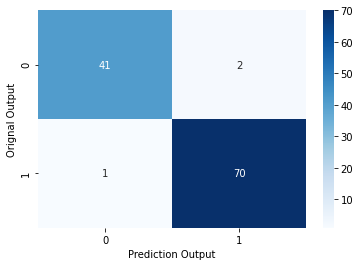

In [ ]:
matrix_report = confusion_matrix(y_test, Y_pred)
sns.heatmap(matrix_report, annot=True, cmap='Blues')
plt.xlabel('Prediction Output')
plt.ylabel('Orignal Output')

Accuracy & Precision

In [ ]:
from sklearn.metrics import recall_score, accuracy_score

accuracy = accuracy_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)

print("Accuracy of Neural Network     = ", accuracy)
print("Recall Value of Neural Network = ",recall)

Accuracy of Neural Network     =  0.9736842105263158
Recall Value of Neural Network =  0.9859154929577465
